In [5]:
import numpy as np
import pandas as pd

#Create a DataFrame from companies.csv
companies = pd.read_csv("companies.csv",sep = "\\t", encoding='ANSI', engine = 'python')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,None
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"""(THE) ONE of THEM,Inc.""",http://oneofthem.jp,Apps|Games|Mobile,operating,None,None,None,None,None
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"""Springfield, Illinois""",Champaign,01-01-2010


In [6]:
#change permalink column to lowercase
companies['permalink'] = pd.DataFrame(map(lambda x: x.lower(), companies.permalink))

# The number of unique companies in "companies"
companies.nunique(axis = 0)

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       138
state_code         312
region            1093
city              5112
founded_at        3978
dtype: int64

In [8]:
#Create a DataFrame from rounds2.csv
rounds2 = pd.read_csv("rounds2.csv", encoding='ANSI')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [9]:
#change company_permalink column to lowercase
rounds2['company_permalink'] = pd.DataFrame(map(lambda x: x.lower(), rounds2.company_permalink))

# The number of unique companies in "rounds2"
rounds2.nunique(axis = 0)

company_permalink           66368
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [10]:
# Renaming the column "permalink" to "company_permalink" to make it unique_id while merging with rounds2
companies.rename(columns={'permalink':'company_permalink'}, inplace=True)
companies.head()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,None
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"""(THE) ONE of THEM,Inc.""",http://oneofthem.jp,Apps|Games|Mobile,operating,None,None,None,None,None
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"""Springfield, Illinois""",Champaign,01-01-2010


In [11]:
# Outer merge of companies to rounds2 to find any company only present in any of the DataFrame
master_frame1 = pd.merge(rounds2, companies, on='company_permalink', how='outer', indicator='Exist')
diff_df = master_frame1.loc[master_frame1['Exist'] != 'both']
diff_df

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Exist
114849,"/organization/zwayo-""on-demand-valet-parking""",/funding-round/eb5163bb6feea4384121e27699bb7b25,seed,NaN,01-09-2014,60000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
114949,"""/organization/zwayo-""""on-demand-valet-parking""""""",NaN,NaN,NaN,NaN,NaN,"""Zwayo """"On-Demand Valet Parking""""""",http://www.zwayo.co,Apps|Cars|Parking,operating,NaN,NaN,NaN,NaN,01-09-2014,right_only


In [12]:
# Found a company whose permalink had an extra semicolon in companies dataframe from that in rounds2. 

inRounds2 = diff_df.loc[114849, 'company_permalink']
inCompanies = diff_df.loc[114949, 'company_permalink']

In [13]:
# Fixing the error in comapnies DataFrame
companies.loc[companies.company_permalink == inCompanies, 'company_permalink'] = inRounds2

In [14]:
# Final merging of comapnies with rounds2
master_frame = pd.merge(rounds2, companies, on='company_permalink', how='inner')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,None
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"""(THE) ONE of THEM,Inc.""",http://oneofthem.jp,Apps|Games|Mobile,operating,None,None,None,None,None
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [15]:
# Remove rows with where investment value is NaN
master_frame.dropna(subset=['raised_amount_usd'], inplace = True)

In [16]:
# Grouping by funding_round_type column
df_by_fundingtype = master_frame.groupby('funding_round_type')
df_by_fundingtype

In [17]:
# Finding the average investments in Venture, angel, seed, private_equity fund types
# This is to find the most suitable fund type to invest with capital of 5 mill - 15 mill USD
average_investments = pd.DataFrame(df_by_fundingtype['raised_amount_usd'].mean())
average_investments.sort_values('raised_amount_usd', ascending = False)

average_investments.astype(str)

,raised_amount_usd
funding_round_type,
angel,958694.4697530865
convertible_note,1453438.5431928127
debt_financing,17043526.023046993
equity_crowdfunding,538368.2109120521
grant,4300576.33945386
non_equity_assistance,411203.05479452055
post_ipo_debt,168704571.8223684
post_ipo_equity,82182493.87101911
private_equity,73308593.02944215


In [434]:
#Finding top 9 countries for venture investment
pi_table = master_frame.pivot_table(values = 'raised_amount_usd', 
                      index = 'country_code', 
                      columns = 'funding_round_type', 
                      aggfunc = 'sum')
pi_table.dropna(subset=['venture'], inplace = True)
df_venture = pd.DataFrame(pi_table.venture)
allcountries = df_venture.sort_values('venture', ascending = False)
top9 = allcountries.loc['USA':'JPN', :].reset_index()
# top9 = top9.reset_index()

In [315]:
mapping = pd.read_csv("mapping.csv", encoding='ANSI')

array(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'], dtype=object)

In [208]:
master_frame['category_list'] = master_frame['category_list'].fillna("")
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x:x.split("|")[0])
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,None,Media
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"""(THE) ONE of THEM,Inc.""",http://oneofthem.jp,Apps|Games|Mobile,operating,None,None,None,None,None,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,None,Games
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics


In [209]:
sector = pd.DataFrame(mapping.category_list)
sector

,category_list
0,NaN
1,3D
2,3D Printing
3,3D Technology
4,Accounting
5,Active Lifestyle
6,Ad Targeting
7,Advanced Materials
8,Adventure Travel
9,Advertising


In [210]:
sector['main_sector'] = mapping.apply(lambda x: mapping.columns[x==1].values[0], axis = 1)
sector.rename(columns={'category_list':'primary_sector'}, inplace=True)

In [211]:
master_frame = pd.merge(master_frame, sector, on = 'primary_sector', how = 'inner')
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,None,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.0,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,Media,Entertainment
5,/organization/akira-mobile,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,NaN,01-08-2012,18410.0,Akira Mobile,http://www.akira.lt/en,Media|Mobile|SMS|Telecommunications,operating,LTU,None,None,None,None,Media,Entertainment
6,/organization/all-day-media,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,NaN,16-12-2014,2000000.0,ALL DAY MEDIA,http://allday.com/,Media|Social Media,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,Media,Entertainment
7,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,None,Media,Entertainment
8,/organization/america-s-real-deal,/funding-round/5fbb191b97ca9789a7196de703983240,equity_crowdfunding,NaN,19-08-2011,670000.0,America's Real Deal,http://americasrealdeal.com/,Media|News,operating,USA,UT,Salt Lake City,Bountiful,03-04-2014,Media,Entertainment
9,/organization/american-gnuity,/funding-round/07cc3eb3afd8ef5812e2b62b254b2040,equity_crowdfunding,NaN,19-08-2011,670000.0,American Gnuity,http://AmericanGnuity.com,Media|News,operating,USA,UT,Salt Lake City,Bountiful,03-04-2014,Media,Entertainment


In [173]:
df_USA = master_frame.loc[(master_frame['country_code'] == 'USA') & (master_frame['funding_round_type'] == 'venture') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
df_USA

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
7,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,None,Media,Entertainment
31,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment
66,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment
67,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment
91,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment
94,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.0,MEDIABONG,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment
104,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.0,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,Media,Entertainment
109,/organization/nokeena,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.0,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment
111,/organization/nokeena,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.0,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment
120,/organization/plumtv,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.0,PlumTV,http://www.plumtv.com,Media|Television|Web Hosting,closed,USA,NY,New York City,New York,01-01-2002,Media,Entertainment


In [213]:
main_sector_list = ["Entertainment", "Manufacturing", "Others", "News, Search and Messaging", "Cleantech / Semiconductors", "Health", "Social, Finance, Analytics, Advertising", "Automotive & Sports"]


In [457]:
main_sector_counts_usa = list(map(lambda c : (df_USA.main_sector == c).sum(), main_sector_list))
main_sec_dic_usa = {'main_sector':main_sector_list, 'total count': main_sector_counts_usa}

In [458]:
tobemergedsectorcount_usa = pd.DataFrame(main_sec_dic_usa)
tobemergedsectorcount_usa

tobeplottedcount_usa = tobemergedsectorcount_usa.set_index('main_sector')
tobeplottedcount_usa = tobeplottedcount_usa.sort_values('total count', ascending = False)
tobeplottedcount_usa = tobeplottedcount_usa.loc[['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'],:]
tobeplottedcount_usa

,total count
main_sector,
Others,2923
Cleantech / Semiconductors,2297
"Social, Finance, Analytics, Advertising",1912


In [ ]:
tobemergedsectorcount_usa['total count'].sum()

In [177]:
df_USA = pd.merge(df_USA, tobemergedsectorcount_usa, on = "main_sector")
df_USA

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total count
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,None,Media,Entertainment,580
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,580
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,580
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,580
4,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,580
5,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.0,MEDIABONG,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment,580
6,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.0,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,Media,Entertainment,580
7,/organization/nokeena,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.0,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,580
8,/organization/nokeena,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.0,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,580
9,/organization/plumtv,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.0,PlumTV,http://www.plumtv.com,Media|Television|Web Hosting,closed,USA,NY,New York City,New York,01-01-2002,Media,Entertainment,580


In [178]:
totalamounttobemerged_usa = df_USA.pivot_table(values = 'raised_amount_usd', 
                      index = 'main_sector',
                      aggfunc = 'sum')
totalamounttobemerged_usa.rename(columns={'raised_amount_usd':'total investment/main_sector'}, inplace=True)

99661524549.0

In [179]:
df_USA = pd.merge(df_USA, totalamounttobemerged_usa, on = "main_sector")
df_USA

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total count,total investment/main_sector
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,None,Media,Entertainment,580,5.000213e+09
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,580,5.000213e+09
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,580,5.000213e+09
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,580,5.000213e+09
4,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,580,5.000213e+09
5,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.0,MEDIABONG,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment,580,5.000213e+09
6,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.0,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,Media,Entertainment,580,5.000213e+09
7,/organization/nokeena,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.0,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,580,5.000213e+09
8,/organization/nokeena,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.0,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,580,5.000213e+09
9,/organization/plumtv,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.0,PlumTV,http://www.plumtv.com,Media|Television|Web Hosting,closed,USA,NY,New York City,New York,01-01-2002,Media,Entertainment,580,5.000213e+09


In [ ]:
totalamounttobemerged_usa['total investment/main_sector'].sum()

In [291]:
comapanywithtopsectorinvestment_usa = df_USA[df_USA.main_sector == "Others"]
comapanywithtopsectorinvestment_usa.pivot_table(values = 'raised_amount_usd', 
                      index = 'name',
                      aggfunc = 'sum').sort_values('raised_amount_usd', ascending = False).astype(str)

,raised_amount_usd
name,
Virtustream,64300000.0
Capella Photonics,54968051.0
AirTight Networks,54201907.0
deCarta,52100000.0
Black Duck Software,51000000.0
Approva,50100000.0
Five9,49600000.0
Bit9,48433533.0
Aryaka Networks,48166500.0


In [292]:
comapanywithsecondtopsectorinvestment_usa = df_USA[df_USA.main_sector == "Cleantech / Semiconductors"]
comapanywithsecondtopsectorinvestment_usa.pivot_table(values = 'raised_amount_usd', 
                      index = 'name',
                      aggfunc = 'sum').sort_values('raised_amount_usd', ascending = False).astype(str)

,raised_amount_usd
name,
Biodesix,75300000.0
Tigo Energy,68739496.0
ForSight Labs,61300001.0
Rheonix,56124758.0
SCIenergy,55375423.0
ALung Technologies,54110403.0
Metabolon,52420551.0
Stretch,52000000.0
iRhythm Technologies,50500000.0


In [215]:
df_GBR = master_frame.loc[(master_frame['country_code'] == 'GBR') & (master_frame['funding_round_type'] == 'venture') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
df_GBR

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
252,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.0,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,None,Application Platforms,"News, Search and Messaging"
291,/organization/geospock-ltd-,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.0,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,Application Platforms,"News, Search and Messaging"
292,/organization/geospock-ltd-,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.0,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,Application Platforms,"News, Search and Messaging"
429,/organization/tao-group-2,/funding-round/ad088f1deeda09f3338adfc324e32dab,venture,NaN,06-05-2004,7000000.0,Tao Group,http://tao-group.com/,Application Platforms|Consumer Electronics,operating,GBR,K7,London,Reading,01-01-1992,Application Platforms,"News, Search and Messaging"
475,/organization/workangel,/funding-round/3ff84c41cfa24575bd6ea60b78f580a6,venture,A,19-01-2015,5000000.0,WorkAngel,http://workangel.com/,Application Platforms|Employer Benefits Progra...,operating,GBR,H9,London,London,01-01-2013,Application Platforms,"News, Search and Messaging"
1033,/organization/flypay,/funding-round/b6854cc7fc06ea76843ec89801f172f2,venture,A,16-07-2015,10700000.0,Flypay,http://www.flypay.co.uk,Apps|Customer Service|Restaurants,operating,GBR,H9,London,London,26-02-2013,Apps,"News, Search and Messaging"
1246,/organization/kaazing,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,NaN,17-04-2013,15000000.0,Kaazing,http://www.kaazing.com,Apps|Data Integration|Enterprise Software|Info...,operating,GBR,H9,London,London,01-05-2007,Apps,"News, Search and Messaging"
1430,/organization/mindshapes,/funding-round/ad81de5d230ca4ef1876e1c71bf097e3,venture,A,01-11-2011,5000000.0,Mindshapes,http://mindshapes.com,Apps|Education|Games|Kids|Textbooks|Virtual Wo...,operating,GBR,H9,London,London,01-01-2010,Apps,"News, Search and Messaging"


In [217]:
main_sector_counts_gbr = list(map(lambda c : (df_GBR.main_sector == c).sum(), main_sector_list))
main_sec_dic_gbr = {'main_sector':main_sector_list, 'total count': main_sector_counts_gbr}

In [455]:
tobemergedsectorcount_gbr = pd.DataFrame(main_sec_dic_gbr)
tobeplottedcount_gbr = tobemergedsectorcount_gbr.set_index('main_sector')
tobeplottedcount_gbr = tobeplottedcount_gbr.sort_values('total count', ascending = False)
tobeplottedcount_gbr = tobeplottedcount_gbr.loc[['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'],:]
tobeplottedcount_gbr

,total count
main_sector,
Others,143
Cleantech / Semiconductors,127
"Social, Finance, Analytics, Advertising",98


In [219]:
tobemergedsectorcount_gbr['total count'].sum()

577

In [220]:
df_GBR = pd.merge(df_GBR, tobemergedsectorcount_gbr, on = "main_sector")
df_GBR

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total count
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,54
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,54
2,/organization/eutechnyx,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,A,13-05-2010,8800000.0,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,Games,Entertainment,54
3,/organization/mind-candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,B,01-06-2011,10000000.0,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,54
4,/organization/mind-candy,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,A,23-11-2006,10860000.0,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,54
5,/organization/mobango,/funding-round/a5c15d027c10bdd8b024823722940b9a,venture,B,31-03-2008,5700000.0,Mobango,http://www.mobango.com,Games,operating,GBR,H9,London,London,01-01-2006,Games,Entertainment,54
6,/organization/naturalmotion,/funding-round/c228343f250a8e67272fd6bf38fd67c3,venture,B,21-06-2012,11000000.0,NaturalMotion,http://naturalmotion.com,Games|Graphics,acquired,GBR,K2,London,Oxford,01-01-2001,Games,Entertainment,54
7,/organization/outplay-entertainment,/funding-round/a4a704f394f2834cdfef60e2a5d4985b,venture,NaN,28-05-2014,5000000.0,Outplay Entertainment,http://outplay.com/,Games|Mobile|Mobile Games|Social Games|Social ...,operating,GBR,U3,Dundee,Dundee,01-01-2010,Games,Entertainment,54
8,/organization/playcast-media,/funding-round/3d4affd163bf57dc9a210141db8751c5,venture,B,25-01-2011,10000000.0,Playcast Media,http://playcast-media.com,Games,operating,GBR,H9,London,London,01-01-2007,Games,Entertainment,54
9,/organization/player-x,/funding-round/2e87ffe1b5abbdddf8c1951ffbb5b7bc,venture,B,18-01-2007,9850000.0,Player X,http://www.playerx.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,54


In [225]:
totalamounttobemerged_gbr = df_GBR.pivot_table(values = 'raised_amount_usd', 
                      index = 'main_sector',
                      aggfunc = 'sum')
totalamounttobemerged_gbr.rename(columns={'raised_amount_usd':'total investment/main_sector'}, inplace=True)
totalamounttobemerged_gbr.astype(str)

,total investment/main_sector
main_sector,
Automotive & Sports,167051565.0
Cleantech / Semiconductors,1136905008.0
Entertainment,461511059.0
Health,214537510.0
Manufacturing,361940335.0
"News, Search and Messaging",615746235.0
Others,1249124289.0
"Social, Finance, Analytics, Advertising",821888357.0


In [222]:
df_GBR = pd.merge(df_GBR, totalamounttobemerged_gbr, on = "main_sector")
df_GBR

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total count,total investment/main_sector
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,54,461511059.0
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,54,461511059.0
2,/organization/eutechnyx,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,A,13-05-2010,8800000.0,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,Games,Entertainment,54,461511059.0
3,/organization/mind-candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,B,01-06-2011,10000000.0,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,54,461511059.0
4,/organization/mind-candy,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,A,23-11-2006,10860000.0,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,54,461511059.0
5,/organization/mobango,/funding-round/a5c15d027c10bdd8b024823722940b9a,venture,B,31-03-2008,5700000.0,Mobango,http://www.mobango.com,Games,operating,GBR,H9,London,London,01-01-2006,Games,Entertainment,54,461511059.0
6,/organization/naturalmotion,/funding-round/c228343f250a8e67272fd6bf38fd67c3,venture,B,21-06-2012,11000000.0,NaturalMotion,http://naturalmotion.com,Games|Graphics,acquired,GBR,K2,London,Oxford,01-01-2001,Games,Entertainment,54,461511059.0
7,/organization/outplay-entertainment,/funding-round/a4a704f394f2834cdfef60e2a5d4985b,venture,NaN,28-05-2014,5000000.0,Outplay Entertainment,http://outplay.com/,Games|Mobile|Mobile Games|Social Games|Social ...,operating,GBR,U3,Dundee,Dundee,01-01-2010,Games,Entertainment,54,461511059.0
8,/organization/playcast-media,/funding-round/3d4affd163bf57dc9a210141db8751c5,venture,B,25-01-2011,10000000.0,Playcast Media,http://playcast-media.com,Games,operating,GBR,H9,London,London,01-01-2007,Games,Entertainment,54,461511059.0
9,/organization/player-x,/funding-round/2e87ffe1b5abbdddf8c1951ffbb5b7bc,venture,B,18-01-2007,9850000.0,Player X,http://www.playerx.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,54,461511059.0


In [223]:
totalamounttobemerged_gbr['total investment/main_sector'].sum()

5028704358.0

In [293]:
comapanywithtopsectorinvestment_gbr = df_GBR[df_GBR.main_sector == "Others"]
comapanywithtopsectorinvestment_gbr.pivot_table(values = 'raised_amount_usd', 
                      index = 'name',
                      aggfunc = 'sum').sort_values('raised_amount_usd', ascending = False).astype(str)

,raised_amount_usd
name,
Electric Cloud,37000000.0
SenSage,36250000.0
Enigmatec,32500000.0
SilverRail Technologies,29000000.0
OpenCloud,27972766.0
MyOptique Group,27694613.0
Notonthehighstreet,26900000.0
ACS Clothing,26239014.0
Tribold,26000000.0


In [295]:
comapanywithsecondtopsectorinvestment_gbr = df_GBR[df_GBR.main_sector == "Cleantech / Semiconductors"]
comapanywithsecondtopsectorinvestment_gbr.pivot_table(values = 'raised_amount_usd', 
                      index = 'name',
                      aggfunc = 'sum').sort_values('raised_amount_usd', ascending = False).astype(str)

,raised_amount_usd
name,
EUSA Pharma,35600000.0
Horizon Discovery,31353719.0
F-star Biotechnology Limited,29132906.0
Elixent,25000000.0
Takeda Cambridge,22340000.0
Immune Targeting Systems,20320961.0
Plaxica,19940192.0
i2O Water,19491529.0
Xention,19051289.0


In [230]:
df_IND = master_frame.loc[(master_frame['country_code'] == 'IND') & (master_frame['funding_round_type'] == 'venture') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
df_IND

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,None,Media,Entertainment
759,/organization/chillr-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,6000000.0,Chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,Apps,"News, Search and Messaging"
1241,/organization/jugnoo,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,venture,A,05-06-2015,5000000.0,JUGNOO,https://jugnoo.in/#/,Apps|Social Business|Software,operating,IND,5,Chandigarh,Chandigarh,01-11-2014,Apps,"News, Search and Messaging"
1638,/organization/peppertap,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,venture,A,14-04-2015,10000000.0,PepperTap,http://www.peppertap.com,Apps|Groceries|Online Shopping,operating,IND,10,New Delhi,Gurgaon,26-11-2014,Apps,"News, Search and Messaging"
2148,/organization/tinyowl-technology,/funding-round/6139214390beddb0910642f6c5bf27b6,venture,C,30-10-2015,7665775.0,TinyOwl Technology,http://tinyowl.com/,Apps|Mobile|Specialty Foods,operating,IND,16,Mumbai,Mumbai,None,Apps,"News, Search and Messaging"
2221,/organization/urbanclap,/funding-round/9aed96d15d4c1588f2ad0c294da9b867,venture,A,29-06-2015,10000000.0,UrbanClap,https://www.urbanclap.com,Apps,operating,IND,7,Delhi,Delhi,01-10-2014,Apps,"News, Search and Messaging"
2539,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10000000.0,Babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,Curated Web,"News, Search and Messaging"
2582,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11750000.0,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,Curated Web,"News, Search and Messaging"
2632,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5000000.0,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging"
2634,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.0,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging"


In [231]:
main_sector_counts_ind = list(map(lambda c : (df_IND.main_sector == c).sum(), main_sector_list))
main_sec_dic_ind = {'main_sector':main_sector_list, 'total count': main_sector_counts_ind}

In [454]:
tobemergedsectorcount_ind = pd.DataFrame(main_sec_dic_ind)
tobeplottedcount_ind = tobemergedsectorcount_ind.set_index('main_sector')
tobeplottedcount_ind = tobeplottedcount_ind.sort_values('total count', ascending = False)
tobeplottedcount_ind = tobeplottedcount_ind.loc[['Others','News, Search and Messaging','Entertainment'],:]
tobeplottedcount_ind

,total count
main_sector,
Others,109
"News, Search and Messaging",52
Entertainment,33


In [233]:
tobemergedsectorcount_ind['total count'].sum()

299

In [234]:
df_IND = pd.merge(df_IND, tobemergedsectorcount_ind, on = "main_sector")
df_IND

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total count
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,None,Media,Entertainment,33
1,/organization/dhruva,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,NaN,27-11-2006,5000000.0,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,Games,Entertainment,33
2,/organization/games2win,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,A,29-03-2007,5000000.0,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,Games,Entertainment,33
3,/organization/games2win,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,B,30-03-2011,6000000.0,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,Games,Entertainment,33
4,/organization/pokkt,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,B,03-11-2015,5000000.0,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,Games,Entertainment,33
5,/organization/taggle-internet-ventures-private,/funding-round/e9948bcf99cef341ba917e917bd1ec3d,venture,NaN,23-06-2010,8750000.0,Taggle Internet Ventures Private,http://www.taggle.com,Games,closed,IND,19,Bangalore,Bengaluru,01-01-2010,Games,Entertainment,33
6,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,None,Entertainment,Entertainment,33
7,/organization/cleartrip,/funding-round/9948b3e11a512230539666870fe8a6fa,venture,NaN,12-12-2006,8000000.0,Cleartrip,http://www.cleartrip.com,Travel,operating,IND,16,Mumbai,Mumbai,04-07-2006,Travel,Entertainment,33
8,/organization/cleartrip,/funding-round/b71847894698280ebac4cadf5fc83ed4,venture,NaN,12-05-2014,5400000.0,Cleartrip,http://www.cleartrip.com,Travel,operating,IND,16,Mumbai,Mumbai,04-07-2006,Travel,Entertainment,33
9,/organization/tripfactory,/funding-round/96cb159e796b822f988b5e85ad35db63,venture,A,31-07-2015,10000000.0,Tripfactory,http://www.tripfactory.com,Travel,operating,IND,19,Bangalore,Bangalore,14-11-2013,Travel,Entertainment,33


In [235]:
totalamounttobemerged_ind = df_IND.pivot_table(values = 'raised_amount_usd', 
                      index = 'main_sector',
                      aggfunc = 'sum')
totalamounttobemerged_ind.rename(columns={'raised_amount_usd':'total investment/main_sector'}, inplace=True)
totalamounttobemerged_ind.astype(str)

,total investment/main_sector
main_sector,
Automotive & Sports,136900000.0
Cleantech / Semiconductors,165380000.0
Entertainment,280830000.0
Health,167740000.0
Manufacturing,200900000.0
"News, Search and Messaging",433834545.0
Others,1007409507.0
"Social, Finance, Analytics, Advertising",290543500.0


In [237]:
df_IND = pd.merge(df_IND, totalamounttobemerged_ind, on = "main_sector")
df_IND

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total count,total investment/main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,None,Media,Entertainment,33,280830000.0
1,/organization/dhruva,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,NaN,27-11-2006,5000000.0,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,Games,Entertainment,33,280830000.0
2,/organization/games2win,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,A,29-03-2007,5000000.0,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,Games,Entertainment,33,280830000.0
3,/organization/games2win,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,B,30-03-2011,6000000.0,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,Games,Entertainment,33,280830000.0
4,/organization/pokkt,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,B,03-11-2015,5000000.0,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,Games,Entertainment,33,280830000.0
5,/organization/taggle-internet-ventures-private,/funding-round/e9948bcf99cef341ba917e917bd1ec3d,venture,NaN,23-06-2010,8750000.0,Taggle Internet Ventures Private,http://www.taggle.com,Games,closed,IND,19,Bangalore,Bengaluru,01-01-2010,Games,Entertainment,33,280830000.0
6,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,None,Entertainment,Entertainment,33,280830000.0
7,/organization/cleartrip,/funding-round/9948b3e11a512230539666870fe8a6fa,venture,NaN,12-12-2006,8000000.0,Cleartrip,http://www.cleartrip.com,Travel,operating,IND,16,Mumbai,Mumbai,04-07-2006,Travel,Entertainment,33,280830000.0
8,/organization/cleartrip,/funding-round/b71847894698280ebac4cadf5fc83ed4,venture,NaN,12-05-2014,5400000.0,Cleartrip,http://www.cleartrip.com,Travel,operating,IND,16,Mumbai,Mumbai,04-07-2006,Travel,Entertainment,33,280830000.0
9,/organization/tripfactory,/funding-round/96cb159e796b822f988b5e85ad35db63,venture,A,31-07-2015,10000000.0,Tripfactory,http://www.tripfactory.com,Travel,operating,IND,19,Bangalore,Bangalore,14-11-2013,Travel,Entertainment,33,280830000.0


In [236]:
totalamounttobemerged_ind['total investment/main_sector'].sum()

2683537552.0

In [296]:
comapanywithtopsectorinvestment_ind = df_IND[df_IND.main_sector == "Others"]
comapanywithtopsectorinvestment_ind.pivot_table(values = 'raised_amount_usd', 
                      index = 'name',
                      aggfunc = 'sum').sort_values('raised_amount_usd', ascending = False).astype(str)

,raised_amount_usd
name,
FirstCry.com,39000000.0
Myntra,38000000.0
CommonFloor,32900000.0
Pepperfry.com,28000000.0
ItzCash Card Ltd.,25000000.0
NxtGen Data Center & Cloud Services,22300000.0
Maharana Infrastructure and Professional Services Private Limited (MIPS),21600000.0
CaratLane,21000000.0
Comat Technologies,21000000.0


In [297]:
comapanywithsecondtopsectorinvestment_ind = df_IND[df_IND.main_sector == "News, Search and Messaging"]
comapanywithsecondtopsectorinvestment_ind.pivot_table(values = 'raised_amount_usd', 
                      index = 'name',
                      aggfunc = 'sum').sort_values('raised_amount_usd', ascending = False).astype(str)

,raised_amount_usd
name,
GupShup,33000000.0
IMImobile,23000000.0
SMS GupShup,22000000.0
hike,21000000.0
Roadrunnr,21000000.0
Matrimony.com,20400000.0
Guruji,15000000.0
Mobile2Win India,15000000.0
Bluestone.com,15000000.0


In [351]:
list_of_funding_types = (average_investments.reset_index())['funding_round_type'].tolist()
list_of_funding_types

['angel',
 'convertible_note',
 'debt_financing',
 'equity_crowdfunding',
 'grant',
 'non_equity_assistance',
 'post_ipo_debt',
 'post_ipo_equity',
 'private_equity',
 'product_crowdfunding',
 'secondary_market',
 'seed',
 'undisclosed',
 'venture']

In [364]:
import matplotlib.pyplot as plt


funding_type_counts = list(map(lambda c : (master_frame.funding_round_type == c).sum(), list_of_funding_types))
funding_type_dict = {'funding_types':list_of_funding_types, 'total count': funding_type_counts}

allfundtypescount = pd.DataFrame(funding_type_dict)
allfundtypescount = allfundtypescount.set_index('funding_types')
focusfindingtypes = allfundtypescount.loc[['venture','seed','private_equity'], :]

allfundtypescount = allfundtypescount.drop(['venture','seed','private_equity'])
focusfindingtypes
allfundtypescount.loc['Others'] = allfundtypescount['total count'].sum()
allfundtypescount
focusfindingtypes.loc['Others'] = allfundtypescount.loc['Others']
focusfindingtypes = focusfindingtypes.reset_index()

In [405]:
focused_investement = average_investments.loc[['private_equity','venture','seed'],:]
focused_investement = focused_investement.reset_index()
focused_investement

,funding_round_type,raised_amount_usd
0,private_equity,7.330859e+07
1,venture,1.174895e+07
2,seed,7.198180e+05


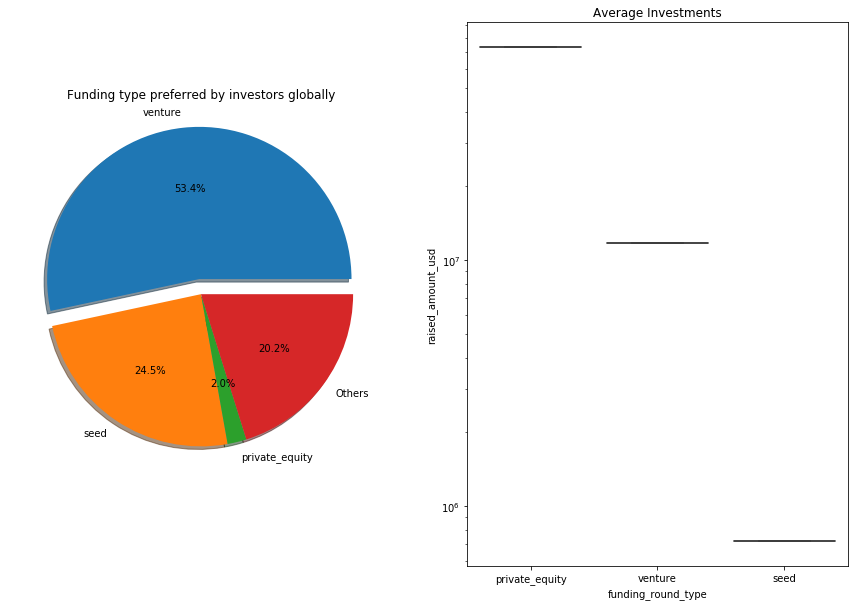

In [473]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))

# subplot 1: Funding type preferred by investors globally
plt.subplot(1, 2, 1)
fundstype = focusfindingtypes['funding_types']
count = focusfindingtypes['total count']
explode = (0.1, 0, 0, 0) 
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
plt.pie(count, labels=fundstype, explode=explode,
autopct='%1.1f%%', shadow=True, startangle=360)
plt.title("Funding type preferred by investors globally")

# subplot 2: Investment average in Private equity, venture and seed
plt.subplot(1, 2, 2)
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=focused_investement)
plt.yscale('log')
plt.title("Average Investments")

plt.show()




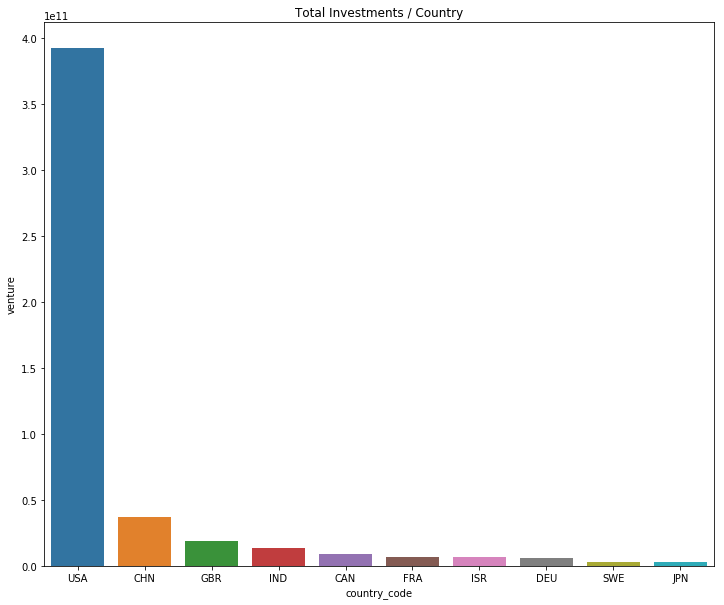

In [435]:
plt.figure(figsize=(12, 10))
top9
sns.barplot(x='country_code', y='venture', data=top9)
plt.title("Total Investments / Country")

plt.show()

In [469]:
tobeplottedcount_usa['Country'] = "USA"
tobeplottedcount_gbr['Country'] = "GBR"
tobeplottedcount_ind['Country'] = "IND"
con = pd.concat([tobeplottedcount_usa, tobeplottedcount_gbr, tobeplottedcount_ind])
con = con.reset_index()
con

,main_sector,total count,Country
0,Others,2923,USA
1,Cleantech / Semiconductors,2297,USA
2,"Social, Finance, Analytics, Advertising",1912,USA
3,Others,143,GBR
4,Cleantech / Semiconductors,127,GBR
5,"Social, Finance, Analytics, Advertising",98,GBR
6,Others,109,IND
7,"News, Search and Messaging",52,IND
8,Entertainment,33,IND


<Figure size 864x720 with 0 Axes>

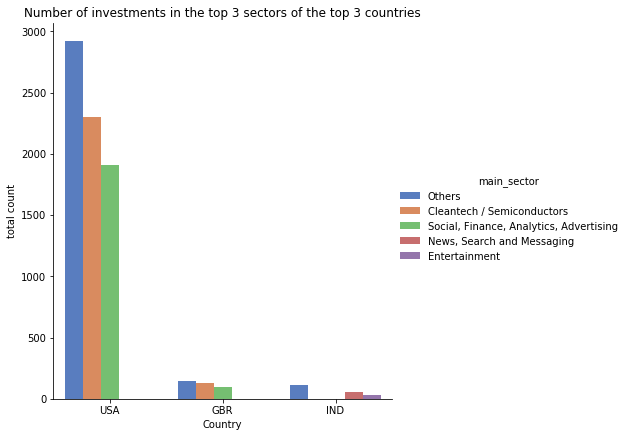

In [472]:
plt.figure(figsize=(12, 10))
sns.catplot(x="Country", y="total count", hue="main_sector", data=con,
                height=6, kind="bar", palette="muted")
plt.title("Number of investments in the top 3 sectors of the top 3 countries")

plt.show()